In [3]:
import pandas as pd
import json
from os import listdir
import numpy as np

# sound libs
import librosa
import pyAudioAnalysis as pya
from pyAudioAnalysis import audioTrainTest


In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from pyAudioAnalysis import MidTermFeatures
import matplotlib.pyplot as plt

name = 'andshewas'
audioDir = f'./tmp/{name}/audios/'
audioFilenames = [audioDir+f for f in listdir(audioDir) if f.endswith('wav')]
testFile = audioFilenames[0]


In [5]:
[Fs, x] = audioBasicIO.read_audio_file(testFile)
print("Audio length:", len(x))
print("Sampling rate:", Fs)


frame = x[:2205]  # First frame of the signal
print(f"First frame shape: {frame.shape}")

# convert stereo to mono. stereo ahs 2 channels
if x.shape[1] == 2:
    x = np.mean(x, axis=1) 

window_size = .05*Fs
step_size = .02*Fs
print("window_size", window_size)
print("step_Size", step_size)



Audio length: 971776
Sampling rate: 44100
First frame shape: (2205, 2)
window_size 2205.0
step_Size 882.0


Short vs. Mid. Midterm is better for overall/aggregate summaries of aduio. SO i will use midterm feature extraction for the summary stats for each audio file. Short term is good for things like note events, i might use this for art later. Mid ex has a bigger step size than short

In [6]:
# short term for more specific things liek spectral features, zero crossing etc
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, window_size, step_size)
print(f_names)

['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy', 'delta energy_entropy', 'delta spectral_centroid', 'delta spectral_spread', 'delta spectral_entropy', 'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1', 'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5', 'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9', 'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13', 'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4', 'delta chroma_5', 'delta chroma_6', 'delta chroma_7', 'delta chroma_8', 'delta chroma_9', 'delta chroma_10',

In [7]:
# Midterm features are better for global things like statistical aggregates, beat, tempo, tonal things,
mid_window_size = 2.0 *Fs
short_window_size = .025*Fs
mid_features, short_features, mid_feature_names = MidTermFeatures.mid_feature_extraction(x, Fs,mid_window_size  , 1.0*Fs,
                           short_window_size, .01*Fs)
print(mid_feature_names)

['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta mfcc_7_mean', 'delta mfcc_8_mean', 'delta mfcc_9_

In [8]:
#quickly visualize with CHATGPT for this code


# Mid-term features visualization
def plot_midterm_features(mid_features, feature_names, title="Mid-Term Features"):
    num_features = mid_features.shape[0] 
    
    # Create subplots
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 2 * num_features))
    
    # If there's only one feature, make axes a list
    if num_features == 1:
        axes = [axes]
    
    for i in range(num_features):
        axes[i].plot(mid_features[i, :])
        axes[i].set_title(feature_names[i])
        axes[i].set_xlabel("Frame Number")
        axes[i].set_ylabel(feature_names[i])
    
    plt.tight_layout()
    plt.show()

# Short-term features visualization (you can visualize a few features of interest)
def plot_shortterm_features(short_features, feature_names, title="Short-Term Features"):
    num_features = short_features.shape[0] 
    
    # Create subplots
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 2 * num_features))
    
    # If there's only one feature, make axes a list
    if num_features == 1:
        axes = [axes]
    
    for i in range(num_features):
        axes[i].plot(short_features[i, :])
        axes[i].set_title(feature_names[i])
        axes[i].set_xlabel("Frame Number")
        axes[i].set_ylabel(feature_names[i])
    
    plt.tight_layout()
    plt.show()


# plot_midterm_features(mid_features, mid_feature_names, title="Mid-Term Features")
# plot_shortterm_features(short_features, f_names, title="Short-Term Features")


now that i have the features, i want do extract things LIKE: 
1. beat (get the bpm, ratio is the confidence of that value)
2. chromagram

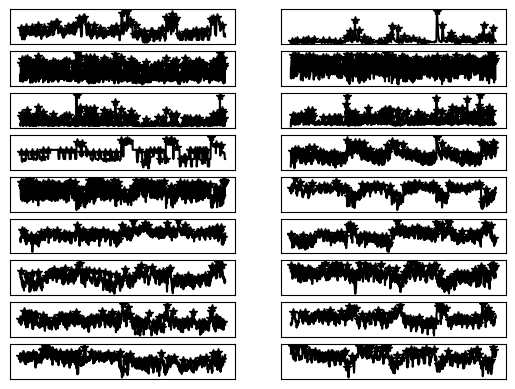

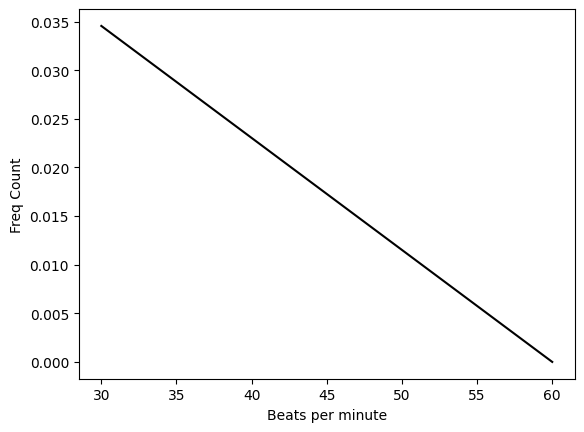

BPM 30.0
ratio 0.9999997105263996


In [9]:

bpm, ratio = MidTermFeatures.beat_extraction(F, 1, plot=True)
print("BPM", bpm)
print('ratio', ratio)


SIZES 2205.0 882.0


100%|██████████| 1099/1099 [00:00<00:00, 3591.04it/s]


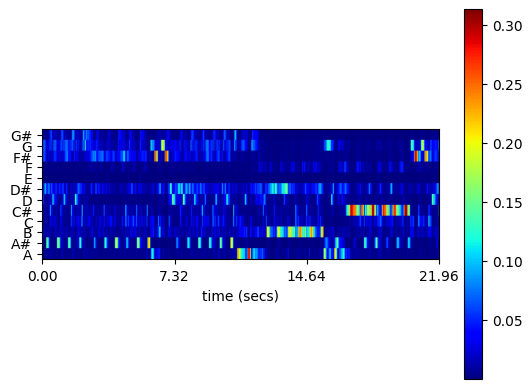

SHAPE (12, 1099)
time axis 1099
{0.0: ['F'],
 0.02: ['F'],
 0.04: [],
 0.06: [],
 0.08: [],
 0.1: ['A#'],
 0.12: [],
 0.14: [],
 0.16: ['F#'],
 0.18: ['F#'],
 0.2: ['F#'],
 0.22: [],
 0.24: ['C#'],
 0.26: ['C#'],
 0.28: ['C#'],
 0.3: ['C#'],
 0.32: ['C#'],
 0.34: ['C#'],
 0.36: [],
 0.38: [],
 0.4: ['F#'],
 0.42: [],
 0.44: ['E'],
 0.46: ['E'],
 0.48: [],
 0.5: [],
 0.52: [],
 0.54: [],
 0.56: [],
 0.58: ['F'],
 0.6: ['F'],
 0.62: [],
 0.64: [],
 0.66: [],
 0.68: [],
 0.7: [],
 0.72: ['A#'],
 0.74: [],
 0.76: [],
 0.78: [],
 0.8: [],
 0.82: [],
 0.84: ['C#'],
 0.86: ['C#'],
 0.88: ['C#'],
 0.9: ['C#'],
 0.92: ['C#'],
 0.94: ['C#'],
 0.96: ['C#'],
 0.98: ['C#'],
 1.0: [],
 1.02: [],
 1.04: [],
 1.06: [],
 1.08: [],
 1.1: [],
 1.12: [],
 1.14: [],
 1.16: [],
 1.18: [],
 1.2: ['F'],
 1.22: ['F'],
 1.24: ['F'],
 1.26: [],
 1.28: [],
 1.3: [],
 1.32: ['A#'],
 1.34: [],
 1.36: ['A#'],
 1.38: [],
 1.4: [],
 1.42: [],
 1.44: ['C#'],
 1.46: ['C#'],
 1.48: ['C#'],
 1.5: ['C#'],
 1.52: ['C#'],
 1

In [31]:
# Chromagram
print("SIZES", window_size, step_size)

chromagram, time_axis, freq_axis = ShortTermFeatures.chromagram(x, Fs, window_size, step_size, plot=True,
               show_progress=True)
chromagram = chromagram.T
# now get the notes at each frame
threshold = 0.09
note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

notes_at_timestamps = {}
print("SHAPE", chromagram.shape)
print("time axis", len(time_axis))
for i, time in enumerate(time_axis):
    # each column is that time index, so just look at this time index
    chroma_frame = chromagram[:, i] 
    active_notes = np.where(chroma_frame>threshold)[0]

    detected_notes = [note_names[note] for note in active_notes]
    notes_at_timestamps[time] = detected_notes

import pprint
pprint.pprint(notes_at_timestamps)

# ShortTermFeatures.spectrogram(x, Fs, window_size, step_size, plot=True,
#                show_progress=True)

Analyzing file 1 of 20: ./tmp/andshewas/audios/0.wav
Analyzing file 2 of 20: ./tmp/andshewas/audios/1.wav
Analyzing file 3 of 20: ./tmp/andshewas/audios/10.wav
Analyzing file 4 of 20: ./tmp/andshewas/audios/11.wav
Analyzing file 5 of 20: ./tmp/andshewas/audios/12.wav
Analyzing file 6 of 20: ./tmp/andshewas/audios/13.wav
Analyzing file 7 of 20: ./tmp/andshewas/audios/14.wav
Analyzing file 8 of 20: ./tmp/andshewas/audios/15.wav
Analyzing file 9 of 20: ./tmp/andshewas/audios/16.wav
Analyzing file 10 of 20: ./tmp/andshewas/audios/17.wav
Analyzing file 11 of 20: ./tmp/andshewas/audios/18.wav
Analyzing file 12 of 20: ./tmp/andshewas/audios/19.wav
Analyzing file 13 of 20: ./tmp/andshewas/audios/2.wav
Analyzing file 14 of 20: ./tmp/andshewas/audios/3.wav
Analyzing file 15 of 20: ./tmp/andshewas/audios/4.wav
Analyzing file 16 of 20: ./tmp/andshewas/audios/5.wav
Analyzing file 17 of 20: ./tmp/andshewas/audios/6.wav
Analyzing file 18 of 20: ./tmp/andshewas/audios/7.wav
Analyzing file 19 of 20: ./

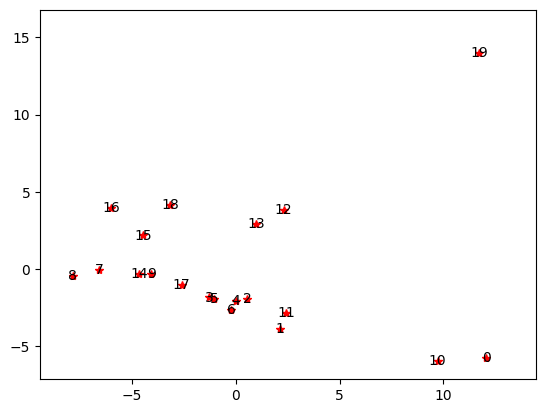

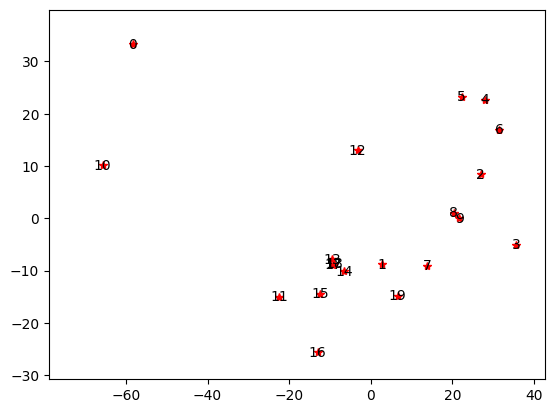

In [ ]:
from pyAudioAnalysis import audioVisualization
audioVisualization.visualizeFeaturesFolder(audioDir, 'pca')
audioVisualization.visualizeFeaturesFolder(audioDir, 'lda')